AI-Driven Customer Segmentation in Marketing Analytics
Project Overview: This notebook demonstrates how to perform customer segmentation using the Mall Customers dataset. We will use clustering techniques (K-Means) to group customers by behavior and preferences, and generate insights for marketing strategies.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [8]:
df = pd.read_csv("Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


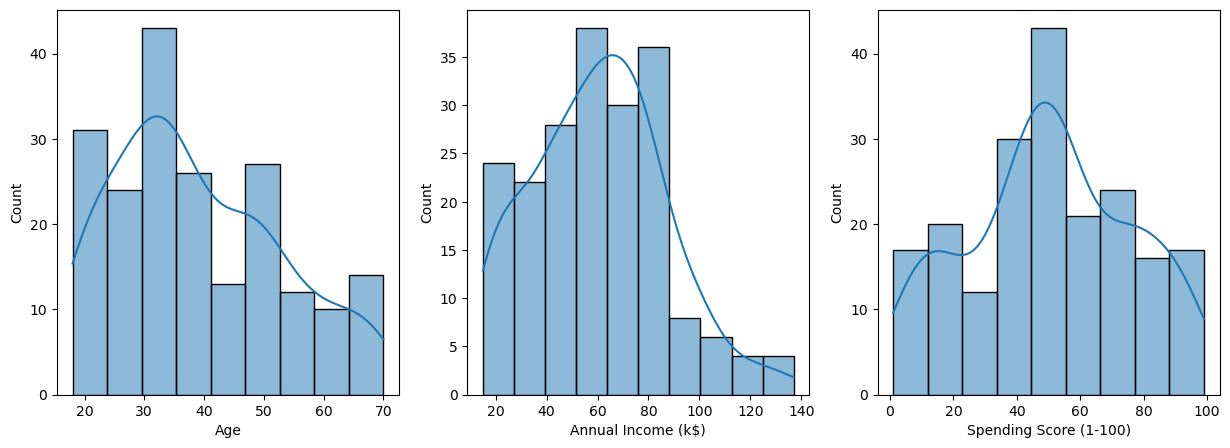

In [9]:
df.info()
df.describe().T
# Check for missing values
df.isnull().sum()
# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
plt.show()

In [16]:
#Drop CustomerID (not useful for clustering)
df_clean = df.drop("CustomerID", axis=1)
# Encode Gender (Genre)
le = LabelEncoder()
df_clean['Genre'] = le.fit_transform(df_clean['Genre'])
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)
scaled_df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


D:\Softwares\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Softwares\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Softwares\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Softwares\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

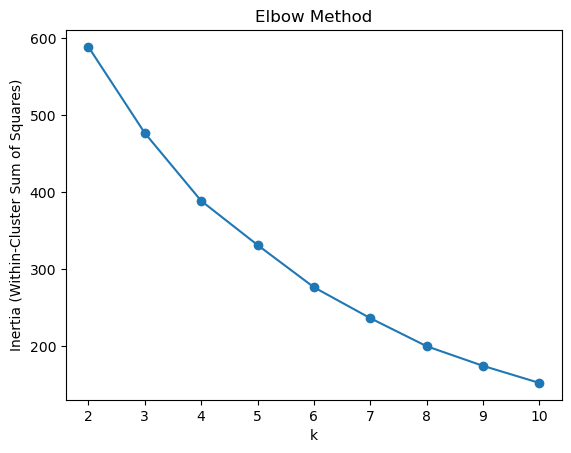

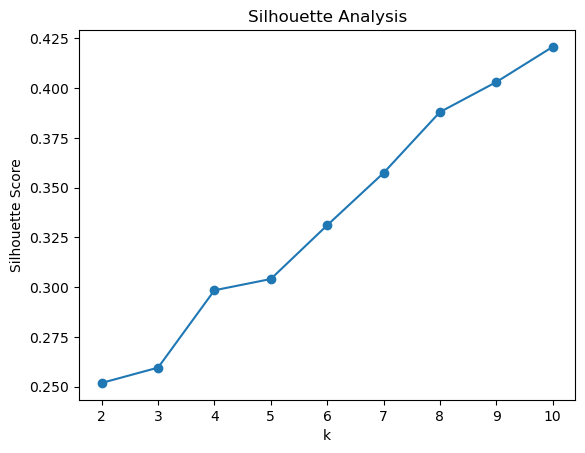

In [20]:
inertia = []
sil_scores = []
K = range(2,11)
for k in K:    
    km = KMeans(n_clusters=k, random_state=42, n_init=10)    
    labels = km.fit_predict(scaled_df)    
    inertia.append(km.inertia_)    
    sil_scores.append(silhouette_score(scaled_df, labels))
# Plot Elbow Method
plt.plot(K, inertia, '-o')
plt.xlabel("k")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method")
plt.show()
# Plot Silhouette Score
plt.plot(K, sil_scores, '-o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)
df.head()

D:\Softwares\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


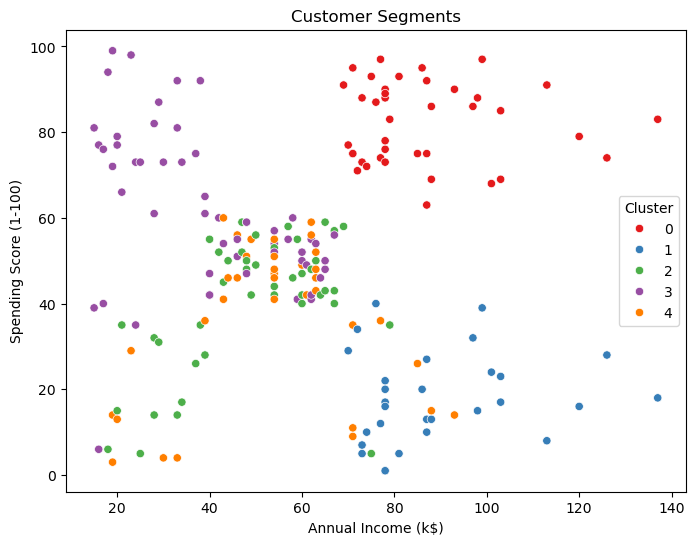

TypeError: agg function failed [how->mean,dtype->object]

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=df, palette="Set1")
plt.title("Customer Segments")
plt.show()
# Cluster summary statistics
cluster_profile = df.groupby("Cluster").mean()
cluster_profile['Count'] = df['Cluster'].value_counts()
cluster_profile

In [28]:
pip install openai


   ---------------------------------------- 0.0/964.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/964.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/964.9 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/964.9 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/964.9 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/964.9 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/964.9 kB ? eta -:--:--
   -------------------- ----------------- 524.3/964.9 kB 281.7 kB/s eta 0:00:02
   -------------------- ----------------- 524.3/964.9 kB 281.7 kB/s eta 0:00:02
   ------------------------------ ------- 786.4/964.9 kB 391.0 kB/s eta 0:00:01
   -------------------------------------- 964.9/964.9 kB 457.6 kB/s eta 0:00:00

   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   